In [19]:
# importing all libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from kneed import KneeLocator

In [20]:
# reading ds

# df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv')
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:100,:]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')

In [21]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [22]:
#selecting 5 columns from df

x = df[['condition', 'sellingprice', 'year','odometer','mmr']]


In [23]:
#Calculating WCSS 

wcss = []

for k in range(1,21):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[78641802744.28252,
 24325407391.03565,
 14519408356.967815,
 9350703119.24922,
 7355595619.48074,
 6032927016.644893,
 5254135528.546336,
 4732417447.902421,
 3585045492.554245,
 3265062609.496912,
 3139864003.648362,
 2725191126.73042,
 2706747433.737147,
 2181051883.7084103,
 1984156486.9572585,
 2085764902.594635,
 1843204997.7983806,
 2016925933.5966096,
 1602247828.7371335,
 1584089211.113125]

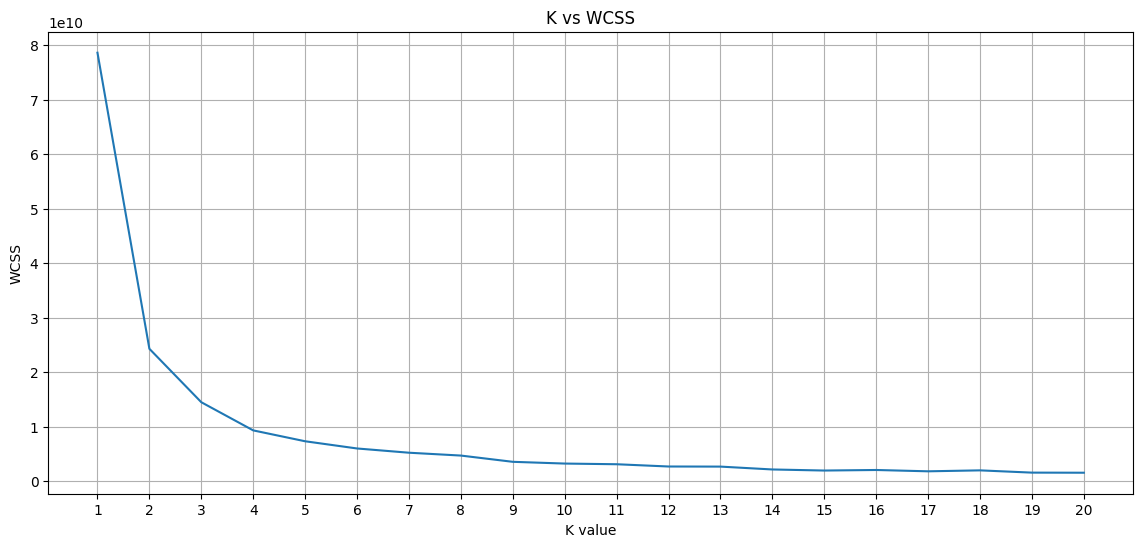

In [25]:
#Plotting WCSS vs K

plt.figure(figsize=(14,6))
sns.lineplot(x= range(1,21), y= wcss, )

plt.xticks(range(1,21))

plt.xlabel("K value")
plt.ylabel("WCSS")
plt.title("K vs WCSS")

plt.grid()
plt.savefig('./Graph/1.K_vs_WCSS.png')
plt.show()

In [26]:
# Finding best K using KneeLocator method 

knee = KneeLocator(range(1,21), wcss, curve='convex', direction='decreasing')

In [27]:
best_k = knee.elbow
print(best_k)

4


In [28]:
kmeans = KMeans(n_clusters= best_k, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

In [29]:
y_predict

array([2, 2, 0, 0, 1, 2, 1, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0,
       3, 2, 1, 2, 0, 0, 0, 2, 3, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       3, 1, 0, 3, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 3,
       3, 0, 2, 2, 2, 0, 2, 1, 2, 0, 3, 2])

In [30]:
#Finding  Final centroids

centroids = kmeans.cluster_centers_
centroids

array([[3.67656431e+01, 3.49629630e+04, 2.01437037e+03, 1.06745556e+04,
        3.62851852e+04],
       [3.31111111e+01, 6.37167222e+04, 2.01405556e+03, 1.28741111e+04,
        6.50055556e+04],
       [1.88305147e+01, 1.60585106e+04, 2.01474468e+03, 1.00477447e+04,
        1.85787234e+04],
       [3.24180912e+01, 1.14375000e+04, 2.01400000e+03, 3.66511250e+04,
        1.34250000e+04]])

In [31]:
# making copy of existing df

x_copy = x.copy()
x_copy['cluster'] = y_predict

In [32]:
x_copy.head()

,condition,sellingprice,year,odometer,mmr,cluster
0,5.0,21500.0,2015,16639.0,20500.0,2
1,5.0,21500.0,2015,9393.0,20800.0,2
2,45.0,30000.0,2014,1331.0,31900.0,0
3,41.0,27750.0,2015,14282.0,27500.0,0
4,43.0,67000.0,2014,2641.0,66000.0,1


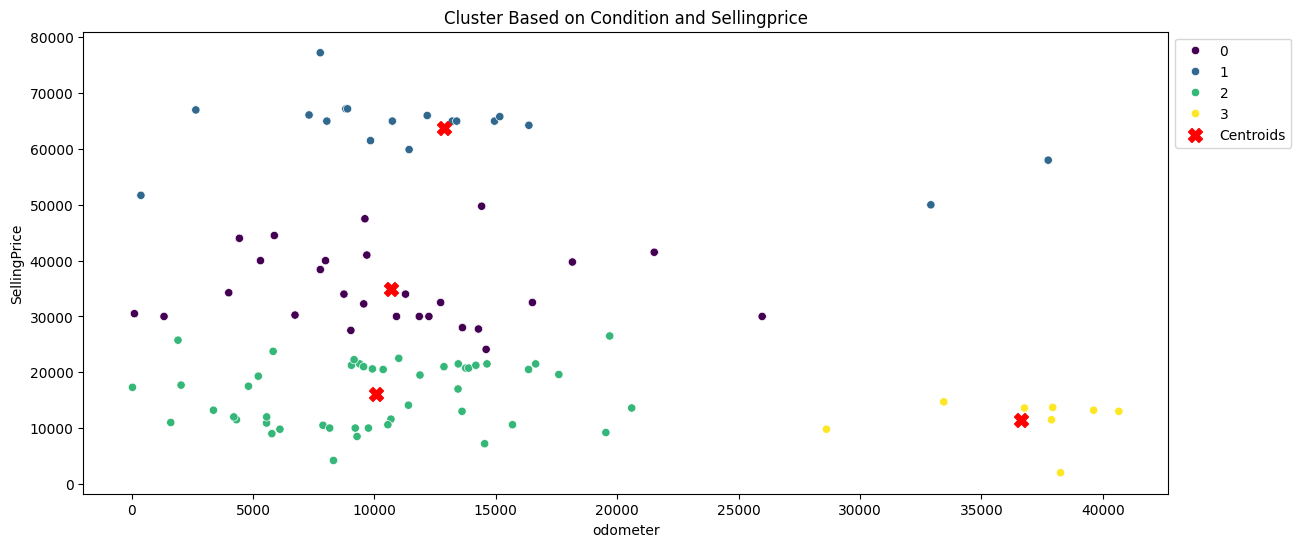

In [33]:
# Plotting cluster of cars on condition and selling price

plt.figure(figsize=(14,6))
sns.scatterplot(data=x_copy, x='odometer', y='sellingprice', hue='cluster', palette='viridis')
plt.scatter(centroids[:,3], centroids[:,1], c='red', marker='X', s= 100,label="Centroids")

plt.xlabel('odometer')
plt.ylabel('SellingPrice')
plt.title('Cluster Based on Condition and Sellingprice')


plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.savefig("./Graph/1.Cluster of Cars based on condition and sellingprice.png")
plt.show()

In [34]:
# Calculating  silhouette_score

silhouette_score_ls = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_score_ls.append(score)

In [35]:
silhouette_score_ls

[0.612899043695466,
 0.49556804739645466,
 0.5426564368294244,
 0.4569984269381886,
 0.47705155229304047,
 0.4546823451892088,
 0.4367032881089593,
 0.43945895219546816]

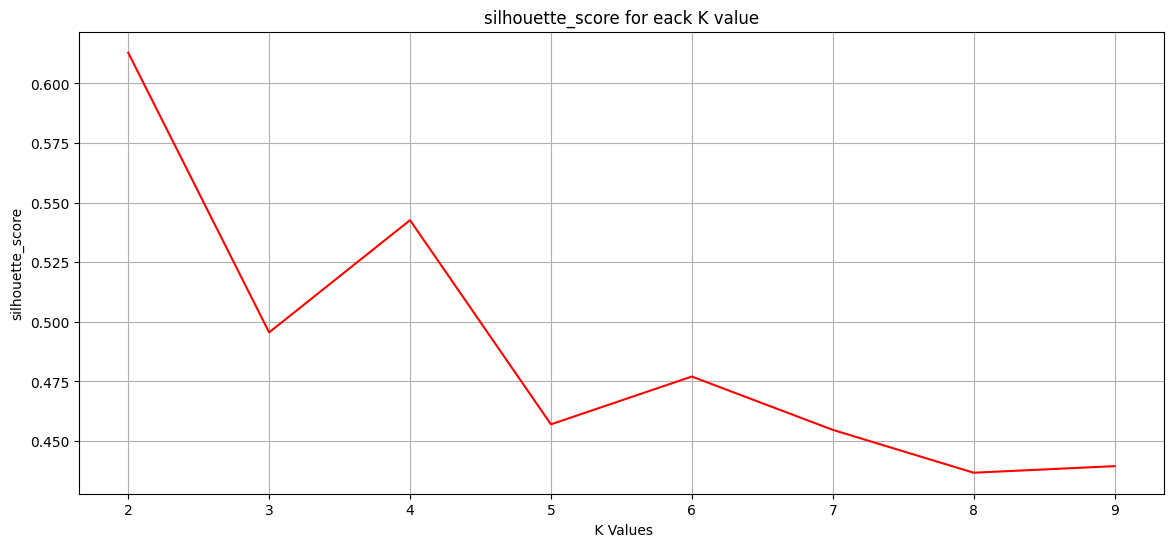

In [36]:
#Plottin silhouette_score VS the K

plt.figure(figsize=(14,6))
plt.plot(range(2,10),silhouette_score_ls,color ='red' )

plt.xticks(range(2,10))

plt.xlabel(" K Values")
plt.ylabel("silhouette_score")
plt.title("silhouette_score for eack K value")

plt.grid()
plt.savefig('./Graph/1.silhouette_score for  K value.png')
plt.show()